Preview of data:
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1    

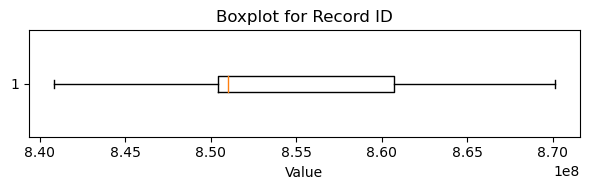

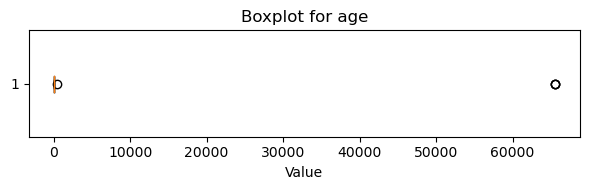


Statistics for numeric columns:
Record ID: Mean = 852947346.61, Variance = 57486250586150.28, Std Dev = 7581968.78
age: Mean = 73.56, Variance = 1401800.87, Std Dev = 1183.98


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

# 1
data = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
print("Preview of data:")
print(data.head())
print("\nData types of each column:")
print(data.dtypes)

# 2
categoricalCols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categoricalCols)

for col in categoricalCols:
    print(f"\nColumn: {col}")
    print("Unique Values:", data[col].unique())
    if data[col].nunique() <= 5:
        print("Suggested: One-Hot Encoding (Nominal)")
    else:
        print("Suggested: Label Encoding (Possibly Ordinal)")

# 3
numericCols = data.select_dtypes(include=[np.number]).columns
print("\nRange for Numeric Columns:")
for col in numericCols:
    print(f"{col}: Min = {data[col].min()}, Max = {data[col].max()}")

# 4
print("\nMissing values in each column:")
print(data.isnull().sum())

# 5
print("\nBoxplots to observe outliers:")
for col in numericCols:
    values = data[col].dropna().tolist()
    plt.figure(figsize=(6, 2))
    plt.boxplot(values, vert=False)
    plt.title(f"Boxplot for {col}")
    plt.xlabel("Value")
    plt.tight_layout()
    plt.show()

# 6
print("\nStatistics for numeric columns:")
for col in numericCols:
    values = data[col].dropna().tolist()
    if len(values) > 1:
        meanVal = statistics.mean(values)
        varVal = statistics.variance(values)
        stdVal = statistics.stdev(values)
        print(f"{col}: Mean = {meanVal:.2f}, Variance = {varVal:.2f}, Std Dev = {stdVal:.2f}")
